# Cryptocurrency miners detection using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: binary detection of cryptocurrency miners (use only first 30 packets)

Raw data from: CESNET-DeCrypto [1]

-----------------------------------------------------------------------
[1] Richard Pln ́y et al. Datasets of Cryptomining Communication. Zenodo, October 2022.

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import catboost as cb

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("../cnsm_final_datasets/cryptomining_design.csv")

In [3]:
df

,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,NaN,NaN,2,2,148,439,1.639497e+09,1.639497e+09,14444,57104,...,-67484.490984,0.498963,0.500429,0.284358,NaN,29.133376,179.824927,-0.497263,0.074001,True
1,NaN,NaN,20,22,1877,6770,1.639497e+09,1.639497e+09,5555,53200,...,16624.248136,0.984107,0.503136,0.283232,NaN,16.475484,10.479260,-0.000199,0.500405,True
2,NaN,NaN,7,7,1245,2957,1.639497e+09,1.639497e+09,14433,52519,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,True
3,NaN,NaN,2,2,148,439,1.639497e+09,1.639497e+09,14444,57104,...,115694.896686,0.509492,0.488942,0.278945,NaN,12.540566,40.043158,-0.145424,0.240606,True
4,NaN,NaN,7,7,1245,2957,1.639497e+09,1.639497e+09,14433,52571,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024898,NaN,NaN,27,20,10075,5634,1.644516e+09,1.644516e+09,443,2024,...,346412.823509,0.654320,0.485402,0.273372,NaN,119.652170,8.479094,-0.000199,0.715044,False
2024899,NaN,NaN,21,16,3004,6665,1.644516e+09,1.644516e+09,443,40076,...,258381.765523,0.936228,0.527018,0.297782,NaN,837.272075,993.283403,-0.016887,0.017552,False
2024900,NaN,NaN,2935,3317,1308550,2056112,1.644516e+09,1.644516e+09,443,36262,...,-261552.961524,0.887753,0.422524,0.236865,NaN,184.639457,29.454925,-0.000199,0.318399,False
2024901,NaN,NaN,9,7,1102,4191,1.644516e+09,1.644516e+09,443,12169,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes

bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


for F in features:
    if F in bool_features:
        continue
    if F in distribution_features:
        df.replace([np.inf], 0.5, inplace=True)
        df.replace([-np.inf], 0.5, inplace=True)
        df.loc[df[F].isnull(), F] = 0.5
    elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
        df.replace([np.inf], 0.5, inplace=True)
        df.replace([-np.inf], 0.5, inplace=True)
        df.loc[df[F].isnull(), F] = 0.5
    elif F in frequency_features: 
        df.replace([np.inf], -1, inplace=True)
        df.replace([-np.inf], -1, inplace=True)
        df.loc[df[F].isnull(), F] = -1
    else:
        df.replace([np.inf], 0, inplace=True)
        df.replace([-np.inf], 0, inplace=True)
        df.loc[df[F].isnull(), F] = 0


for F in bool_features:
    df.loc[df[F].isnull(), F] = False
    df[F] = df[F].astype('bool')

In [6]:
df

,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,NaN,NaN,2,2,148,439,1.639497e+09,1.639497e+09,14444,57104,273,273.5,205.766858,42341,-0.140430,200.75,346.25,128,419,291,128,75.372476,145,53.113553,309.794287,0.500000,0.500000,0.704681,2.651059,-1.973593,5.739099e-08,0.000000e+00,0.006873,0.250024,1.000000,1.000000,0.563329,False,0.477121,0.0,0.0,0.500000,0.660714,1.000000,2.0,0.0,2.0,2.0,2.000000,2.0,2.0,2.0,1.000000,False,2.000000,False,0.0,0.0,547,0.500000,False,0,0.0,-3.547767e+01,29.119334,0.996225,0.498963,0.999518,0.716704,1.00000,4997.590154,-1.0,9.216136e+06,-67484.490984,0.498963,0.500429,0.284358,-1.0,29.133376,179.824927,-0.497263,True,True,1
1,NaN,NaN,20,22,1877,6770,1.639497e+09,1.639497e+09,5555,53200,406,336.0,359.758252,129427,-0.060387,301.00,336.00,84,1440,1356,336,88.610407,216,53.201970,537.029468,0.850000,0.150000,0.194575,2.451646,1.892487,1.610753e-08,1.744409e-08,-5.000000,6.137370,2.419241,0.559760,0.624693,False,0.721787,0.0,1.0,0.327778,0.888889,5.900000,3.0,0.0,12.0,18.0,0.947368,1.0,0.0,2.0,0.473684,False,1.052632,True,0.0,1.0,6707,0.200000,False,0,0.0,-1.167948e+00,1.678669,0.984305,0.984107,0.101889,0.051009,0.12287,509.444579,-1.0,1.353158e+06,16624.248136,0.984107,0.503136,0.283232,-1.0,16.475484,10.479260,-0.000199,True,True,1
2,NaN,NaN,7,7,1245,2957,1.639497e+09,1.639497e+09,14433,52519,576,353.0,440.507662,194048,-0.133292,326.50,598.50,315,1520,1205,315,76.477025,310,53.819444,706.463223,0.714286,0.285714,0.592498,3.121399,0.758392,1.002750e-08,1.299713e-08,-0.834559,3.071602,2.521641,0.898227,0.448785,False,0.796548,0.0,0.0,0.000000,0.291667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,False,1.666667,True,0.0,0.0,4038,0.285714,False,0,0.0,-1.022540e-16,-1.000000,0.582204,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.0,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,0.000000,False,True,1
3,NaN,NaN,2,2,148,439,1.639497e+09,1.639497e+09,14444,57104,273,273.5,205.766858,42341,-0.140430,200.75,346.25,128,419,291,128,75.372476,145,53.113553,309.794287,0.500000,0.500000,0.704681,2.651059,-1.973593,5.739099e-08,0.000000e+00,0.006873,0.250024,1.000000,1.000000,0.563329,False,0.477121,0.0,0.0,0.500000,0.660714,0.500000,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,False,2.000000,False,0.0,0.0,547,0.500000,False,0,0.0,-4.466079e+00,12.185155,0.654916,0.509492,0.971659,0.219109,1.00000,4858.295315,-1.0,7.279583e+06,115694.896686,0.509492,0.488942,0.278945,-1.0,12.540566,40.043158,-0.145424,True,True,1
4,NaN,NaN,7,7,1245,2957,1.639497e+09,1.639497e+09,14433,52571,576,353.0,440.507662,194048,-0.133292,326.50,598.50,315,1520,1205,315,76.477025,310,53.819444,706.463223,0.714286,0.285714,0.592498,3.121399,0.758392,1.002750e-08,1.299713e-08,-0.834559,3.071602,2.521641,0.898227,0.448785,False,0.796548,0.0,0.0,0.000000,0.291667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,False,1.66

In [7]:
print(f"botnet: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

botnet: 695496	clear: 1329407


In [8]:
df = df[["LABEL_code"] + features].copy()

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [10]:
df.shape

(2024903, 77)

In [11]:
print(f"botnet: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

botnet: 695496	clear: 1329407


In [12]:
df_features = df

In [13]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [14]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 50, 5),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 400, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [15]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [2:02:24<00:00, 73.44s/trial, best loss: -0.9982250280637456] 
The best hyperparameters are :  

{'colsample_bytree': 0.7684282791221851, 'gamma': 6.084800808382009, 'max_depth': 25.0, 'min_child_weight': 4.0, 'n_estimators': 300.0, 'reg_alpha': 17.0, 'reg_lambda': 0.7925240030959909}


In [16]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL_code']  # Labels
      #Split on train and test
      X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
      X_train = X_train_a[features]
      X_test = X_test_a[features] 
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      precision = precision_score(y_test, y_pred)  * 100
      recall = recall_score(y_test, y_pred)  * 100
      F1 = f1_score(y_test, y_pred)  * 100
      print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      
      return model, X_test, y_test

99.88 & 99.92 & 99.74 & 99.83 \\


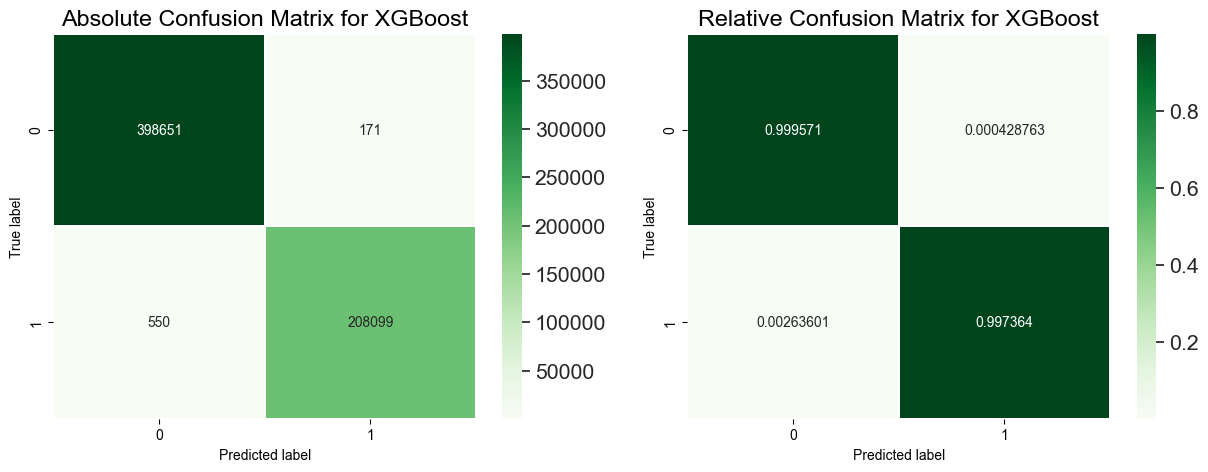

In [17]:
model, X_test, y_test = XGBoost_classification_tunned(best_hyperparams)

In [18]:

def while_XGBoost_classification_tunned(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best_results = (0,"",None,None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        for F, N in zip(
                [ features], # statistics_features, time_features, distribution_features, frequency_features, behavior_features, 
                [ "All"], # "Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based", 
        ):
                X_train = X_train_a[F]
                X_test = X_test_a[F] 
                model = XGBClassifier(
                        n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                        reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                        colsample_bytree=int(best_hyperparams['colsample_bytree']),
                        # subsample=int(best_hyperparams['subsample']),
                        # eta=best_hyperparams['eta'],
                )
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
                precision = precision_score(y_test, y_pred)  * 100
                recall = recall_score(y_test, y_pred)  * 100
                F1 = f1_score(y_test, y_pred)  * 100
                if N == "All":
                    tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\hline"
                    tmp_str += "\n"
                    tmp_f1 = F1
                elif N in ["Statistical-based", "Distribution-based", "Behavior-based"]:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
                else:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & \\rowcolor{LigthGray} " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
        if best_results[0] < tmp_f1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (tmp_f1, tmp_str, matrix, percentage_matrix, model)
    print("")
    print("")
    print("")
    print(best_results[0])
    print(best_results[1])
    plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4]

24


99.841966805835
\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.89 & 99.91 & 99.77 & 99.84 \\
\hline



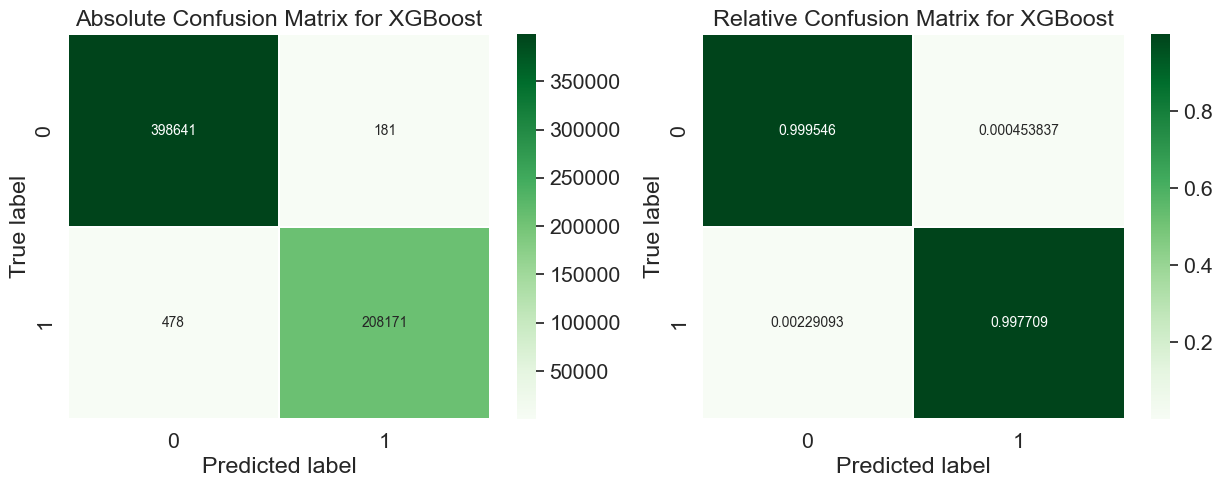

In [19]:
best_model = while_XGBoost_classification_tunned(best_hyperparams, cycles=25)

# Evaluation

In [20]:
df_validation = pd.read_csv("../cnsm_final_datasets/cryptomining_evaluation.csv")

In [21]:
df_validation

,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,NaN,NaN,191,188,10765,50973,1.647758e+09,1.647758e+09,4444,52168,209,221.0,92.913939,8633,-0.384501,99.00,314.0,99,314,215,99,44.456430,81,38.755981,228.551015,0.366667,0.633333,1.183891,4.369635,-0.248564,6.233434e-07,6.566425e-07,-0.023256,1.278231,1.892272,0.385636,0.549860,False,0.668727,0.000000,0.666959,0.455309,0.451087,61.466667,60.0,30.0,105.0,135.0,4.655172,1.0,0.0,15.0,0.310345,False,2.000000,False,0.0,0.666959,3237,0.300000,False,0,0.0,-8.843324e-03,0.460736,0.999801,0.532736,0.052789,0.091441,0.00208,2.639437e+02,NaN,5.280826e+04,14301.538431,0.199771,0.503294,0.230154,NaN,8.727921,1.650374e+01,-0.467065,0.053616,True
1,NaN,NaN,12,36,1104,39515,1.648240e+09,1.648240e+09,443,50166,900,1103.5,595.227688,354297,-0.203830,333.00,1508.0,84,1508,1424,1508,66.136410,543,60.333333,1067.957597,0.428571,0.571429,-1.021458,2.682167,-0.512347,4.064469e-09,4.569391e-09,0.034894,1.127692,2.978095,0.782195,0.527571,False,0.844307,0.000000,0.000000,0.000000,0.888889,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,False,1.692308,True,0.0,0.000000,12612,0.214286,False,0,0.0,-3.455617e-17,NaN,0.540484,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False
2,NaN,NaN,117,124,17036,28086,1.647402e+09,1.647402e+09,9033,37256,418,143.0,508.947934,259028,0.098115,143.00,463.0,114,1508,1394,143,121.757879,374,89.473684,652.523767,0.700000,0.300000,0.540330,2.182934,1.447668,6.068340e-09,6.392511e-09,-0.718750,3.567438,1.778511,0.362452,0.528996,False,0.722879,0.000000,1.000000,0.589412,0.683824,50.100000,69.0,7.0,78.0,85.0,2.931034,1.0,0.0,28.0,0.104680,False,1.172414,True,0.0,1.000000,7621,0.366667,False,0,0.0,-1.258144e+00,0.188585,0.996424,0.960068,0.036177,0.038381,0.00328,1.808859e+02,NaN,1.309956e+06,-33132.694769,0.038255,0.501281,0.326268,NaN,5.212822,1.160794e+01,-0.036356,0.584415,False
3,NaN,NaN,7,9,869,3899,1.646941e+09,1.646941e+09,443,45339,848,577.0,547.001828,299211,-0.215769,570.00,1428.0,237,1428,1191,1428,64.504933,464,54.716981,979.016445,0.600000,0.400000,-1.060326,3.595966,-0.782617,8.682681e-23,1.294338e-22,0.351981,0.842347,1.921928,0.827729,0.486321,False,0.698970,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,False,1.500000,True,0.0,0.000000,4240,0.200000,False,0,0.0,-1.496355e-17,NaN,0.753455,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False
4,NaN,NaN,172,162,8944,45338,1.647734e+09,1.647734e+09,4444,43768,233,216.0,109.110036,11906,-0.362135,102.00,314.0,102,568,466,314,46.828342,87,37.339056,257.177500,0.533333,0.466667,-0.742370,4.426724,0.479149,5.645564e-07,5.947150e-07,-0.235849,3.699268,1.965739,0.400608,0.491949,False,0.702060,0.774484,0.692117,0.498815,0.443182,112.233333,100.0,68.0,187.0,225.0,7.758621,2.0,0.0,45.0,0.172414,False,2.000000,False,0.0,0.692117,2210,0.300000,False,0,0.0,-5.185349

In [22]:
import sklearn
pd.set_option('display.max_columns', None)

df_validation['LABEL'] = df_validation.LABEL.astype('category')
df_validation["LABEL_code"] = df_validation["LABEL"].cat.codes

bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


for F in list(df_validation.keys()):
    if F in bool_features or F == "LABEL":
        continue
    if F in distribution_features:
        df_validation.replace([np.inf], 0.5, inplace=True)
        df_validation.replace([-np.inf], 0.5, inplace=True)
        df_validation.loc[df_validation[F].isnull(), F] = 0.5
    elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
        df_validation.replace([np.inf], 0.5, inplace=True)
        df_validation.replace([-np.inf], 0.5, inplace=True)
        df_validation.loc[df_validation[F].isnull(), F] = 0.5
    elif F in frequency_features: 
        df_validation.replace([np.inf], -1, inplace=True)
        df_validation.replace([-np.inf], -1, inplace=True)
        df_validation.loc[df_validation[F].isnull(), F] = -1
    else:
        df_validation.replace([np.inf], 0, inplace=True)
        df_validation.replace([-np.inf], 0, inplace=True)
        df_validation.loc[df_validation[F].isnull(), F] = 0


for F in bool_features:
    df_validation.loc[df_validation[F].isnull(), F] = False
    df_validation[F] = df_validation[F].astype('bool')

In [23]:
print(f"botnet: {len(df_validation[df_validation['LABEL_code'] == 1])}\tclear: {len(df_validation[df_validation['LABEL_code'] == 0])}")

botnet: 392577	clear: 682999


In [24]:
df_validation = clean_dataset(df_validation)

In [25]:
print(f"botnet: {len(df_validation[df_validation['LABEL_code'] == 1])}\tclear: {len(df_validation[df_validation['LABEL_code'] == 0])}")

botnet: 392577	clear: 682999


\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.20 & 99.58 & 98.21 & 98.89 \\
\hline



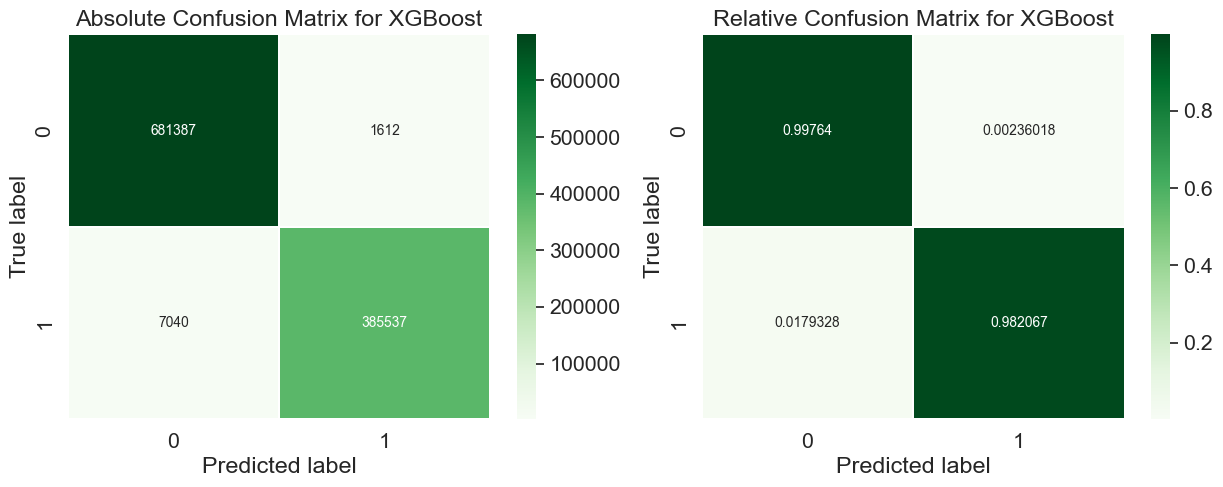

In [26]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

In [27]:
import csv

problem = "Cryptomining"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    writer.writerow([problem, "-", accuracy, precision, recall, F1, 0, 0, 0])

In [28]:
y_pred_proba = best_model.predict_proba(X_test)

In [29]:
t = None
best = 0
for _t in range(50, 100, 1):
    _t = _t / 100

    y_pred = []
    for p_0, p_1 in y_pred_proba:
        if p_1 >= _t:
            y_pred.append(1)
        else:
            y_pred.append(0)   
            
    accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
    precision = precision_score(y_test, y_pred)  * 100
    recall = recall_score(y_test, y_pred)  * 100
    F1 = f1_score(y_test, y_pred)  * 100
    print(t, _t, accuracy, precision, recall, F1)
    if precision >= 99.99 and F1 > best:
        best = F1
        t = _t
best, t

None 0.5 99.89365747500703 99.926551421206 99.76371801446449 99.8450683282249
None 0.51 99.89398670883054 99.92990777591612 99.76132164544282 99.84554354760567
None 0.52 99.89266977353651 99.93230234445143 99.7550910859865 99.8436180827385
None 0.53 99.89135283824248 99.93517687110761 99.74838125272586 99.8416916921719
None 0.54 99.89102360441898 99.93805373478355 99.74454706229122 99.84120663765849
None 0.55 99.88871896765443 99.94188699181134 99.73400303859592 99.83783680049129
None 0.56 99.88723741544864 99.9452428527513 99.72633465772661 99.83566875619242
None 0.57 99.88723741544864 99.94860167741068 99.7229797410963 99.8356632367865
None 0.58 99.88575586324285 99.95243883105216 99.71483208642266 99.83349408112247
None 0.59 99.88460354486057 99.9548372218165 99.70908080077068 99.83180776659428
None 0.6 99.88361584339005 99.95723620987891 99.70380878892303 99.83036166317552
None 0.61 99.87966503750796 99.95963207519968 99.68990984859741 99.82458876744214
None 0.62 99.87719578383165 

(99.71091112259242, 0.8)

In [30]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    
y_pred_proba = best_model.predict_proba(X_validation)

In [31]:
y_pred_proba

array([[3.4154654e-03, 9.9658453e-01],
       [9.9869031e-01, 1.3097017e-03],
       [9.9960905e-01, 3.9092908e-04],
       ...,
       [9.6181458e-01, 3.8185429e-02],
       [9.9967128e-01, 3.2872244e-04],
       [9.9996674e-01, 3.3265675e-05]], dtype=float32)

In [32]:
y_pred = []
for p_0, p_1 in y_pred_proba:
    if p_1 >= 0.96:
        y_pred.append(1)
    else:
        y_pred.append(0)    

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}95.29 & 99.99 & 87.12 & 93.11 \\
\hline



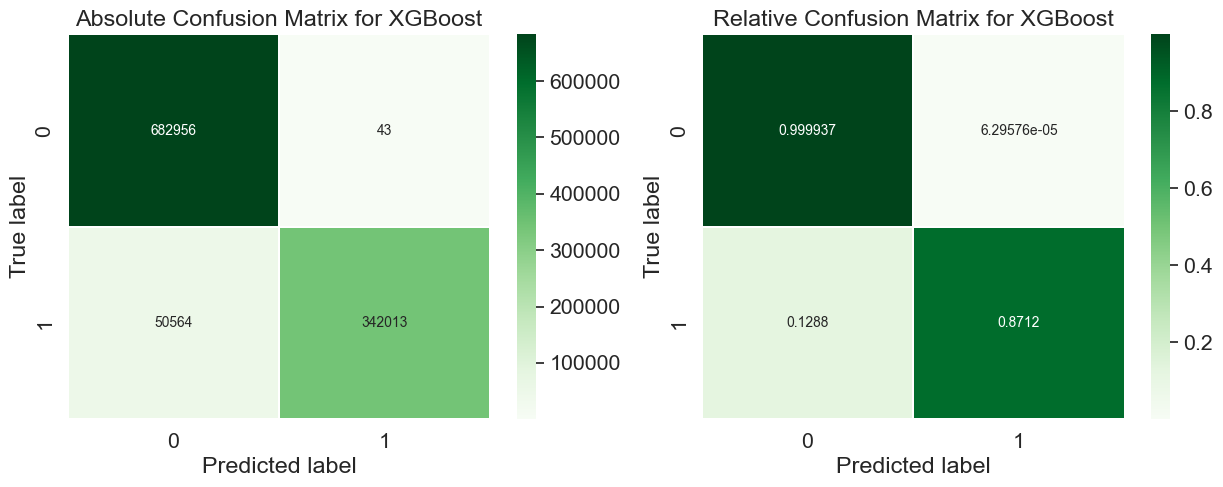

In [33]:

accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

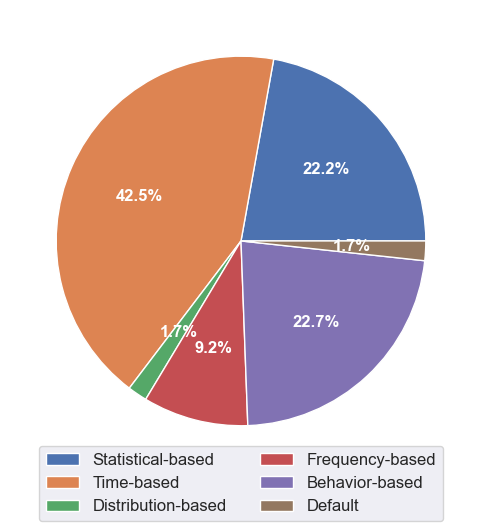

In [34]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()
f_df = feat_importances[default_faetures].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf, f_df]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based",  "Default"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [35]:
data

[0.1862874, 0.35720602, 0.014357813, 0.07739055, 0.19080752, 0.014357813]

In [36]:
feat_importances

PERIODICITY_SCDF      0.000000
SPECTRAL_SKEWNESS     0.000000
TIME                  0.000000
PERIODICITY           0.000000
SPECTRAL_BANDWIDTH    0.000000
                        ...   
SWITCHING_METRIC      0.045270
MEAN_DIFFTIMES        0.063053
TRANSIENTS            0.112688
CNT_DISTRIBUTION      0.160066
MEDIAN_SCALED_TIME    0.241753
Length: 76, dtype: float32

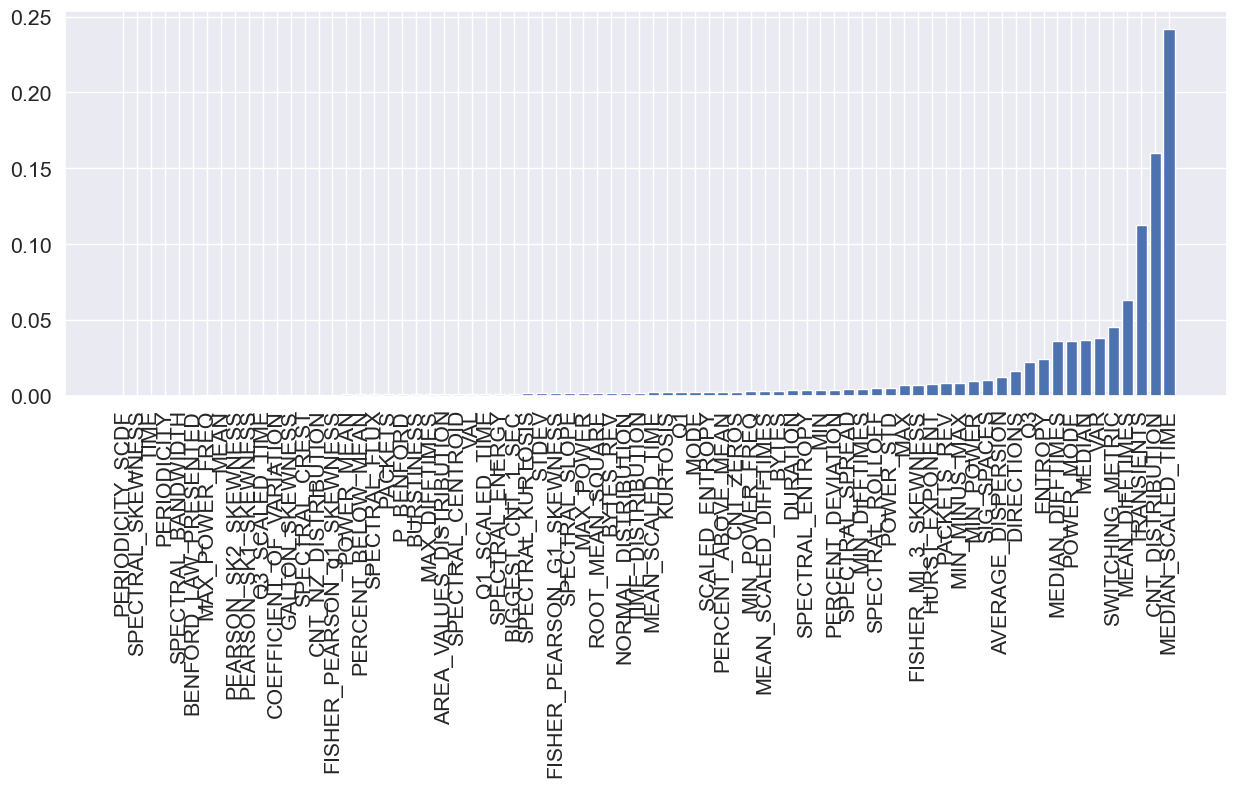

In [37]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [38]:
feat_importances.keys()

Index(['PERIODICITY_SCDF', 'SPECTRAL_SKEWNESS', 'TIME', 'PERIODICITY',
       'SPECTRAL_BANDWIDTH', 'BENFORD_LAW_PRESENTED', 'MAX_POWER_FREQ', 'MEAN',
       'PEARSON_SK2_SKEWNESS', 'PEARSON_SK1_SKEWNESS', 'Q3_SCALED_TIME',
       'COEFFICIENT_OF_VARIATION', 'GALTON_SKEWNESS', 'SPECTRAL_CREST',
       'CNT_NZ_DISTRIBUTION', 'FISHER_PEARSON_g1_SKEWNESS', 'POWER_MEAN',
       'PERCENT_BELOW_MEAN', 'SPECTRAL_FLUX', 'PACKETS', 'P_BENFORD',
       'BURSTINESS', 'MAX_DIFFTIMES', 'AREA_VALUES_DISTRIBUTION',
       'SPECTRAL_CENTROID', 'VAL', 'Q1_SCALED_TIME', 'SPECTRAL_ENERGY',
       'BIGGEST_CNT_1_SEC', 'SPECTRAL_KURTOSIS', 'STDEV',
       'FISHER_PEARSON_G1_SKEWNESS', 'SPECTRAL_SLOPE', 'MAX_POWER',
       'ROOT_MEAN_SQUARE', 'BYTES_REV', 'NORMAL_DISTRIBUTION',
       'TIME_DISTRIBUTION', 'MEAN_SCALED_TIME', 'KURTOSIS', 'Q1', 'MODE',
       'SCALED_ENTROPY', 'PERCENT_ABOVE_MEAN', 'CNT_ZEROS', 'MIN_POWER_FREQ',
       'MEAN_SCALED_DIFFTIMES', 'BYTES', 'DURATION', 'SPECTRAL_ENTROPY', 'MIN',
 

In [39]:
feat_importances.to_dict()

{'PERIODICITY_SCDF': 0.0,
 'SPECTRAL_SKEWNESS': 0.0,
 'TIME': 0.0,
 'PERIODICITY': 0.0,
 'SPECTRAL_BANDWIDTH': 0.0,
 'BENFORD_LAW_PRESENTED': 0.0,
 'MAX_POWER_FREQ': 0.0002947673783637583,
 'MEAN': 0.0004647105233743787,
 'PEARSON_SK2_SKEWNESS': 0.0005062959971837699,
 'PEARSON_SK1_SKEWNESS': 0.0005169132491573691,
 'Q3_SCALED_TIME': 0.0005253424751572311,
 'COEFFICIENT_OF_VARIATION': 0.0005803302046842873,
 'GALTON_SKEWNESS': 0.000585466914344579,
 'SPECTRAL_CREST': 0.0006020539440214634,
 'CNT_NZ_DISTRIBUTION': 0.0006750334869138896,
 'FISHER_PEARSON_g1_SKEWNESS': 0.0006854453240521252,
 'POWER_MEAN': 0.0008199396543204784,
 'PERCENT_BELOW_MEAN': 0.0008237945148721337,
 'SPECTRAL_FLUX': 0.0009062871686182916,
 'PACKETS': 0.0009786856826394796,
 'P_BENFORD': 0.0011158973211422563,
 'BURSTINESS': 0.0011614245595410466,
 'MAX_DIFFTIMES': 0.00116637849714607,
 'AREA_VALUES_DISTRIBUTION': 0.001207812805660069,
 'SPECTRAL_CENTROID': 0.0012547281803563237,
 'VAL': 0.0012571880361065269,
 'Q

# Feature selection

In [40]:
def perform_val(selected_features, best_hyperparams=None, cycles=25):
    if best_hyperparams is None:
        df_to_tunne = df_features.sample(100000)
        best_hyperparams = tunne_together_XGBoost_classification(df_to_tunne, selected_features, verbose=False)
    
    X=df_features[selected_features]  # Features
    y=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test   
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
        )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
        precision = precision_score(y_test, y_pred)  * 100
        recall = recall_score(y_test, y_pred)  * 100
        F1 = f1_score(y_test, y_pred)  * 100
        if F1 > best:   
            best = F1
            best_model = model
            
    
    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
    precision = precision_score(y_validation, y_pred)  * 100
    recall = recall_score(y_validation, y_pred)  * 100
    F1 = f1_score(y_validation, y_pred)  * 100
    
    return accuracy,precision,recall,F1

In [41]:
import FEATURE_REDUCTED as FR
REPORTS = []

report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [05:04<00:00,  3.05s/trial, best loss: -0.9885280964417655]
The best hyperparameters are :  

{'colsample_bytree': 0.31289703495559656, 'gamma': 6.639927648641983, 'max_depth': 35.0, 'min_child_weight': 0.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.8419839067837609}
100%|██████████| 100/100 [03:28<00:00,  2.09s/trial, best loss: -0.9954950543531486]
The best hyperparameters are :  

{'colsample_bytree': 0.8319299637713123, 'gamma': 2.1291997335989556, 'max_depth': 40.0, 'min_child_weight': 2.0, 'n_estimators': 350.0, 'reg_alpha': 2.0, 'reg_lambda': 0.483128165540427}
100%|██████████| 100/100 [04:06<00:00,  2.46s/trial, best loss: -0.9935064935064936]
The best hyperparameters are :  

{'colsample_bytree': 0.06421099862939211, 'gamma': 8.119302676935412, 'max_depth': 50.0, 'min_child_weight': 9.0, 'n_estimators': 250.0, 'reg_alpha': 0.0, 'reg_lambda': 0.6715195474721241}
100%|██████████| 100/100 [04:19<00:00,  2.60s/trial, best loss: -0.9923759891

In [42]:
import csv

problem = "Cryptomining"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        writer.writerow([problem, f_set, report[0], report[1], report[2], report[3], 0, 0, 0])